<a href="https://colab.research.google.com/github/artrizzo/Python/blob/main/Curso_Data_Science_Intermedi%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Base

In [2]:
dados = pd.read_csv(r'https://raw.githubusercontent.com/ribeiromatheus/imdb-dataset/master/movies.csv')

In [3]:
dados

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
dados.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
dados.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#Tratamento de nulos

In [6]:
dados['director_facebook_likes'].fillna(dados['director_facebook_likes'].mean())

0           0.000000
1         563.000000
2           0.000000
3       22000.000000
4         131.000000
            ...     
5038        2.000000
5039      686.509212
5040        0.000000
5041        0.000000
5042       16.000000
Name: director_facebook_likes, Length: 5043, dtype: float64

Para ser permanente na tabela:

In [7]:
dados['director_facebook_likes'] = dados['director_facebook_likes'].fillna(dados['director_facebook_likes'].mean())

In [8]:
dados['director_facebook_likes'] = dados['director_facebook_likes'].fillna(dados['director_facebook_likes'].median())

In [9]:
dados['director_facebook_likes'] = dados['director_facebook_likes'].fillna(dados['director_facebook_likes'].mode())

Para retirar linhas que contenham valores nulos: 

In [10]:
dados.dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [11]:
dados = dados.dropna()

#Tratamento de duplicadas

In [12]:
dados_duplicados = dados[['color', 'language']]

In [13]:
dados_duplicados

,color,language
0,Color,English
1,Color,English
2,Color,English
3,Color,English
5,Color,English
...,...,...
5026,Color,French
5027,Color,Persian
5033,Color,English
5035,Color,Spanish


In [14]:
dados_duplicados.drop_duplicates()

,color,language
0,Color,English
111,Black and White,English
327,Color,Mandarin
377,Color,Aboriginal
484,Color,Spanish
504,Color,French
811,Black and White,Filipino
1171,Black and White,Mandarin
1236,Color,Maya
1298,Black and White,French


In [15]:
dados_duplicados.drop_duplicates().count()

color       41
language    41
dtype: int64

In [16]:
##selecionando somente variáveis de uma coluna
dados_duplicados.drop_duplicates(subset='color')

,color,language
0,Color,English
111,Black and White,English


In [17]:
dados_duplicados.drop_duplicates(subset='language')

,color,language
0,Color,English
327,Color,Mandarin
377,Color,Aboriginal
484,Color,Spanish
504,Color,French
811,Black and White,Filipino
1236,Color,Maya
1324,Color,Kazakh
1398,Color,Cantonese
1517,Color,Japanese


In [18]:
dados_duplicados.drop_duplicates(subset='color', keep='last')

,color,language
5015,Black and White,English
5042,Color,English


#tratamento de string

In [19]:
dados.director_name[0].replace(' ','_')

'James_Cameron'

In [20]:
dados.director_name[0].replace(' ','_').lower()

'james_cameron'

In [21]:
dados.director_name[0].replace(' ','_').upper()

'JAMES_CAMERON'

In [22]:
for i in dados.index:
  dados.director_name[i] = dados.director_name[i].replace(' ','_').lower()

<ipython-input-22-beeca47605d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.director_name[i] = dados.director_name[i].replace(' ','_').lower()


In [23]:
dados

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,james_cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,gore_verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,sam_mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,christopher_nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,andrew_stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,olivier_assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,jafar_panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,shane_carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,robert_rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


padronização

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
dados_padronizados = dados[['gross', 'imdb_score']]

In [26]:
scaler.fit_transform(dados_padronizados)

array([[10.06838386,  1.35849773],
       [ 3.65235082,  0.6009981 ],
       [ 2.09734725,  0.31693574],
       ...,
       [-0.74227242,  0.50631065],
       [-0.71928572,  0.4116232 ],
       [-0.74710167,  0.12756084]])

In [27]:
dados_padronizados_2 = scaler.fit_transform(dados_padronizados)

Espelhando padrões de bases:

In [28]:
pd.DataFrame(dados_padronizados_2, index = dados_padronizados.index, columns = dados_padronizados.columns)

,gross,imdb_score
0,10.068384,1.358498
1,3.652351,0.600998
2,2.097347,0.316936
3,5.625462,1.926622
5,0.290802,0.127561
...,...,...
5026,-0.746379,0.411623
5027,-0.738731,0.979748
5033,-0.742272,0.506311
5035,-0.719286,0.411623


#Outliers

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('/content/drive/My Drive/Arquivos python/listings.csv', usecols = ['room_type', 'price'])

In [36]:
df.head()

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55


In [37]:
df

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5592,Entire home/apt,128
5593,Entire home/apt,100
5594,Entire home/apt,400
5595,Entire home/apt,60


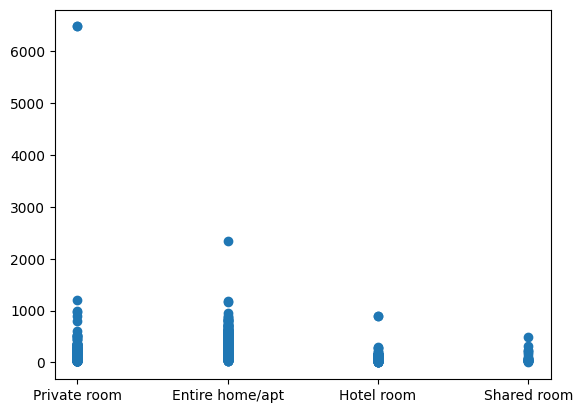

In [38]:
plt.scatter(df.room_type, df.price)

In [39]:
plt.show()

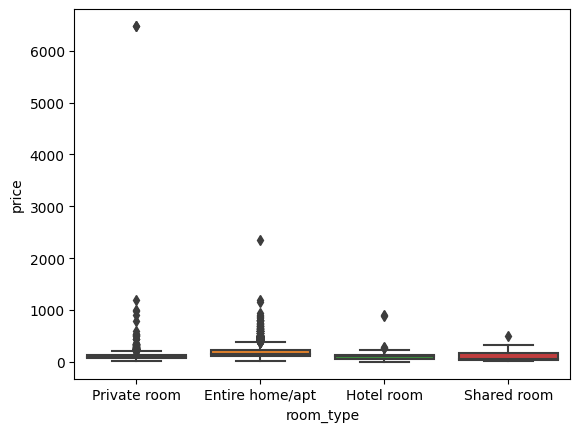

In [40]:
sns.boxplot(y = 'price', x= 'room_type', data = df)
plt.show()

In [41]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQ = Q3-Q1
  LI = df < (Q1 - 1.5*IQ)
  LS = df > (Q3 + 1.5*IQ)

  df_final = df[~(LI | LS)] ##limite inferior ou limite superior - ~ = negação do que está sendo dito
  return df_final

In [42]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)

In [43]:
df_removido

,price
0,59
1,106
2,135
3,75
4,55
...,...
5591,52
5592,128
5593,100
5595,60


In [44]:
ind_dif = df.index.difference(df_removido.index)

In [45]:
ind_dif

Int64Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
            ...
            5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
           dtype='int64', length=259)

Substituindo outliers pela média da coluna price

In [46]:
media_price = df.price.mean()
print(media_price)

163.92871180989815


In [47]:
for i in range(0, len(ind_dif), 1):
  df. loc[ind_dif[i], 'price'] = media_price

In [48]:
ind_dif[0]

38

In [49]:
df.head(39)

,room_type,price
0,Private room,59.000000
1,Private room,106.000000
2,Private room,135.000000
3,Private room,75.000000
4,Private room,55.000000
5,Entire home/apt,240.000000
6,Entire home/apt,160.000000
7,Entire home/apt,250.000000
8,Private room,118.000000
9,Entire home/apt,222.000000


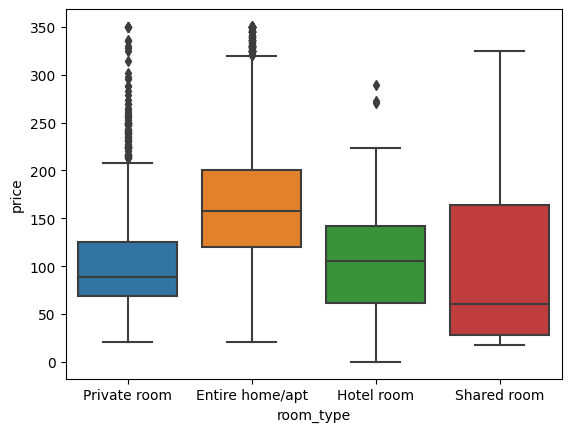

In [50]:
sns.boxplot(y='price', x='room_type', data=df)
plt.show()

#Tratamento de variáveis Categóricas

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
dados = pd.read_csv('/content/drive/My Drive/Arquivos python/listings.csv')

In [54]:
dados

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,59,3,285,2021-11-21,1.83,1,51,7,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-04-09,2.35,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.387610,4.891880,Private room,135,2,227,2021-12-06,1.87,1,0,8,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.890920,Private room,75,2,372,2021-12-12,2.69,2,206,36,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.365840,4.891110,Private room,55,2,525,2022-01-02,3.99,2,193,46,0363 607B EA74 0BD8 2F6F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,54115977,Spacious & Bright Appartement close to Vondelpark,6370784,Anke,NaN,Zuid,52.349325,4.849871,Entire home/apt,128,3,0,NaN,NaN,1,6,0,0363 5743 9133 3628 37CA
5593,54125298,Luxury apartment in city centre,21081740,Steven,NaN,De Baarsjes - Oud-West,52.365888,4.873004,Entire home/apt,100,10,0,NaN,NaN,1,31,0,0363 35A7 7EB7 3D9C 96A3
5594,54126733,Mediterraans design loft in de Pijp Amsterdam,11632814,Jorrit,NaN,De Pijp - Rivierenbuurt,52.353757,4.905991,Entire home/apt,400,2,0,NaN,NaN,1,363,0,0363 6FDC 0E33 44C1 941C
5595,54134640,Cosy & peaceful sanctuary in Amsterdam near Am...,418516420,Anne,NaN,Watergraafsmeer,52.341317,4.920622,Entire home/apt,60,5,0,NaN,NaN,1,285,0,0363 2DC5 9BFE 700E B647


In [55]:
dados['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'De Baarsjes - Oud-West',
       'De Pijp - Rivierenbuurt', 'Zuid', 'Oud-Oost', 'Noord-West',
       'Slotervaart', 'Bos en Lommer', 'IJburg - Zeeburgereiland',
       'Watergraafsmeer', 'Westerpark', 'Geuzenveld - Slotermeer',
       'Noord-Oost', 'Buitenveldert - Zuidas', 'Oud-Noord',
       'De Aker - Nieuw Sloten', 'Osdorp', 'Bijlmer-Centrum',
       'Gaasperdam - Driemond', 'Bijlmer-Oost'], dtype=object)

In [56]:
len(dados['neighbourhood'].unique())

22

Aplicando Get dummies

In [57]:
pd.get_dummies(dados.neighbourhood) ##transforma os dados unicos da coluna neighbourhood em colunas. Não é uma boa opção para se trabalhar
##Outra opção é o LabelEncoder

,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5593,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5594,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
le = LabelEncoder()

In [59]:
le.fit_transform(dados['neighbourhood'])

array([14,  4,  5, ...,  8, 19, 19])

In [60]:
##tornando um dataframe de array para coluna
dados['nova coluna'] = le.fit_transform(dados['neighbourhood'])

In [61]:
dados

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,nova coluna
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,59,3,285,2021-11-21,1.83,1,51,7,0363 5F3A 5684 6750 D14D,14
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-04-09,2.35,2,0,0,0363 CBB3 2C10 0C2A 1E29,4
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.387610,4.891880,Private room,135,2,227,2021-12-06,1.87,1,0,8,0363 974D 4986 7411 88D8,5
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.890920,Private room,75,2,372,2021-12-12,2.69,2,206,36,0363 607B EA74 0BD8 2F6F,5
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.365840,4.891110,Private room,55,2,525,2022-01-02,3.99,2,193,46,0363 607B EA74 0BD8 2F6F,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,54115977,Spacious & Bright Appartement close to Vondelpark,6370784,Anke,NaN,Zuid,52.349325,4.849871,Entire home/apt,128,3,0,NaN,NaN,1,6,0,0363 5743 9133 3628 37CA,21
5593,54125298,Luxury apartment in city centre,21081740,Steven,NaN,De Baarsjes - Oud-West,52.365888,4.873004,Entire home/apt,100,10,0,NaN,NaN,1,31,0,0363 35A7 7EB7 3D9C 96A3,7
5594,54126733,Mediterraans design loft in de Pijp Amsterdam,11632814,Jorrit,NaN,De Pijp - Rivierenbuurt,52.353757,4.905991,Entire home/apt,400,2,0,NaN,NaN,1,363,0,0363 6FDC 0E33 44C1 941C,8
5595,54134640,Cosy & peaceful sanctuary in Amsterdam near Am...,418516420,Anne,NaN,Watergraafsmeer,52.341317,4.920622,Entire home/apt,60,5,0,NaN,NaN,1,285,0,0363 2DC5 9BFE 700E B647,19


In [62]:
dados.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
nova coluna                         int64
dtype: object

In [63]:
colunas = pd.DataFrame(dados.dtypes).reset_index().rename(columns={'index': 'nome', 0: 'tipo'})
categ_cols = colunas[colunas.tipo =='object']

In [64]:
for i in categ_cols.index:
  dados[str(categ_cols['nome'][i])+'_encoded'] = le.fit_transform(dados[categ_cols['nome'][i]])
  dados = dados.drop(categ_cols['nome'][i], axis = 1)

In [65]:
dados

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,nova coluna,name_encoded,host_name_encoded,neighbourhood_encoded,room_type_encoded,last_review_encoded,license_encoded
0,2818,3159,NaN,52.364350,4.943580,59,3,285,1.83,1,51,7,14,3979,444,14,2,806,1410
1,20168,59484,NaN,52.364070,4.893930,106,1,339,2.35,2,0,0,4,4703,52,4,2,468,3118
2,27886,97647,NaN,52.387610,4.891880,135,2,227,1.87,1,0,8,5,4112,718,5,2,821,2263
3,28871,124245,NaN,52.367750,4.890920,75,2,372,2.69,2,206,36,5,1464,556,5,2,827,1429
4,29051,124245,NaN,52.365840,4.891110,55,2,525,3.99,2,193,46,4,1485,556,4,2,848,1429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,54115977,6370784,NaN,52.349325,4.849871,128,3,0,NaN,1,6,0,21,4327,117,21,0,853,1297
5593,54125298,21081740,NaN,52.365888,4.873004,100,10,0,NaN,1,31,0,7,3193,2120,7,0,853,804
5594,54126733,11632814,NaN,52.353757,4.905991,400,2,0,NaN,1,363,0,8,3257,1139,8,0,853,1681
5595,54134640,418516420,NaN,52.341317,4.920622,60,5,0,NaN,1,285,0,19,1533,128,19,0,853,684


#Regressão Linear

In [66]:
dados = dados.fillna(0)
dados = dados.drop('id', axis = 1)

In [67]:
dados

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,nova coluna,name_encoded,host_name_encoded,neighbourhood_encoded,room_type_encoded,last_review_encoded,license_encoded
0,3159,0.0,52.364350,4.943580,59,3,285,1.83,1,51,7,14,3979,444,14,2,806,1410
1,59484,0.0,52.364070,4.893930,106,1,339,2.35,2,0,0,4,4703,52,4,2,468,3118
2,97647,0.0,52.387610,4.891880,135,2,227,1.87,1,0,8,5,4112,718,5,2,821,2263
3,124245,0.0,52.367750,4.890920,75,2,372,2.69,2,206,36,5,1464,556,5,2,827,1429
4,124245,0.0,52.365840,4.891110,55,2,525,3.99,2,193,46,4,1485,556,4,2,848,1429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,6370784,0.0,52.349325,4.849871,128,3,0,0.00,1,6,0,21,4327,117,21,0,853,1297
5593,21081740,0.0,52.365888,4.873004,100,10,0,0.00,1,31,0,7,3193,2120,7,0,853,804
5594,11632814,0.0,52.353757,4.905991,400,2,0,0.00,1,363,0,8,3257,1139,8,0,853,1681
5595,418516420,0.0,52.341317,4.920622,60,5,0,0.00,1,285,0,19,1533,128,19,0,853,684


O objetivo deste teste é tentar prever o preço dos quartos do AirBnB.
Vamos fazer uma regressão para o preço.

x = variável explicativa
y = variável resposta

In [68]:
x = dados.drop(['price','host_id', 'neighbourhood_group'], axis= 1)
y = dados.price

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [71]:
x_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,nova coluna,name_encoded,host_name_encoded,neighbourhood_encoded,room_type_encoded,last_review_encoded,license_encoded
3846,52.37852,4.84943,3,6,0.21,1,2,1,2,4338,803,2,0,765,2075
790,52.36529,4.85138,3,138,1.76,1,304,5,7,856,2109,7,2,837,1083
2497,52.36437,4.94105,3,12,0.25,2,0,0,14,4470,1538,14,0,222,2233
461,52.35092,4.84941,2,37,0.41,1,8,0,21,107,959,21,0,440,3223
4928,52.38394,4.85249,2,0,0.00,1,0,0,2,3301,2028,2,0,853,1128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,52.36609,4.86708,1,3,0.10,1,0,0,7,1808,285,7,0,313,3648
5191,52.36937,4.91548,3,5,1.06,1,0,5,4,2699,1557,4,0,785,2113
5226,52.37012,4.87740,1,4,1.20,2,92,4,5,633,1388,5,2,814,2317
5390,52.35101,4.89613,5,0,0.00,1,0,0,8,800,751,8,0,853,3416


In [72]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

In [73]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.05112576992599982

#K Means Clustering

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
dataset = pd.read_csv('/content/drive/My Drive/Arquivos python/Mall_Customers.csv')

In [90]:
x = dataset.drop('CustomerID', axis = 1)

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x.Genre = le.fit_transform(x.Genre)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

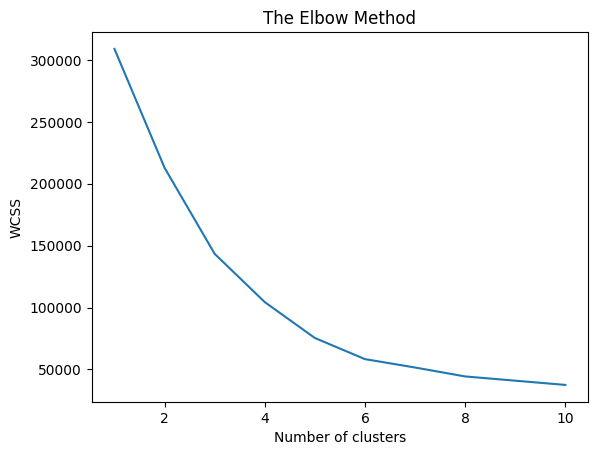

In [92]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [94]:
x['cluster'] = y_kmeans

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

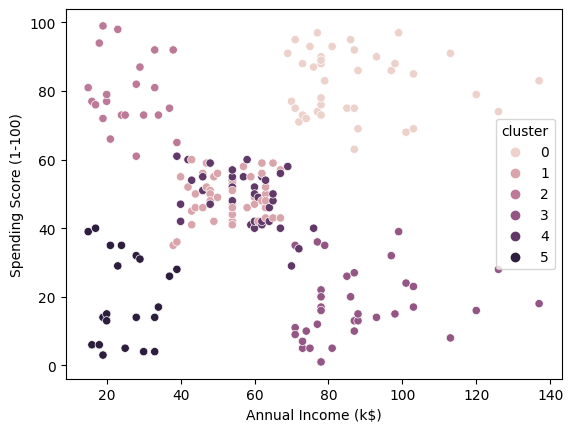

In [95]:
import seaborn as sns

sns.scatterplot(data = x, x = 'Annual Income (k$)', y =  'Spending Score (1-100)', hue = 'cluster')